# CS909 Data Mining - Assignment 1

> Abishekraj Vinayagar Gnanasambandam (u2238887)


 ##### <font color='Blue'>1(i) How many training and test examples are there? How many positive and negative examples are there in the training dataset? </font>

There are 3000 examples in each of the training and test data sets given. Out of which, there are 2389 Negative class examples and 611 Positive class examples.

In [397]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import itertools

dict = __builtins__.dict

X_train = np.array(pd.read_csv("../data/Xtrain.csv", sep=' ', header=None))
Y_train = np.array(pd.read_csv("../data/Ytrain.csv", sep=' ', header=None))
X_test = np.array(pd.read_csv("../data/Xtest.csv", sep=' ', header=None))

print("Number of elemenets in training set: " + str(len(X_train)))
print("Number of elements in test set: " + str(len(Y_train)))

unique, counts = np.unique(Y_train, return_counts=True)
class_sep = dict(zip(unique, counts))

print("Negative Class: " +  str(class_sep.get(-1)))
print("Positive Class: " +  str(class_sep.get(1)))


Number of elemenets in training set: 3000
Number of elements in test set: 3000
Negative Class: 2389
Positive Class: 611


##### <font color='#5FE1A7'> 1(ii) Show at least 10 randomly selected objects of each class using plt.matshow by reshaping the flattened array to 28x28. What are your observations about the nature of the data? Also show 10 randomly selected objects from the test set. Do you see any issues in the data that may limit the generalization performance of your classifier? </font>


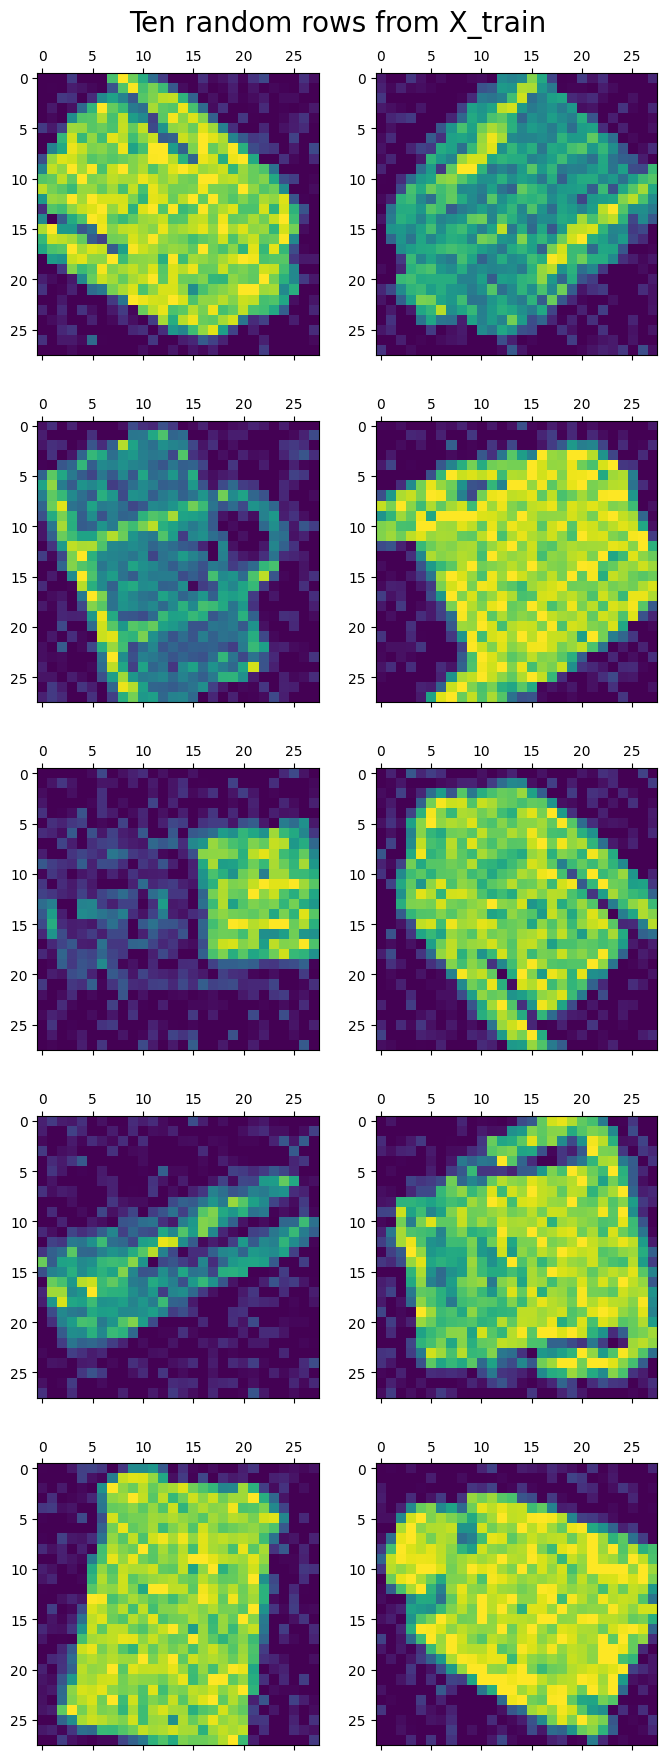

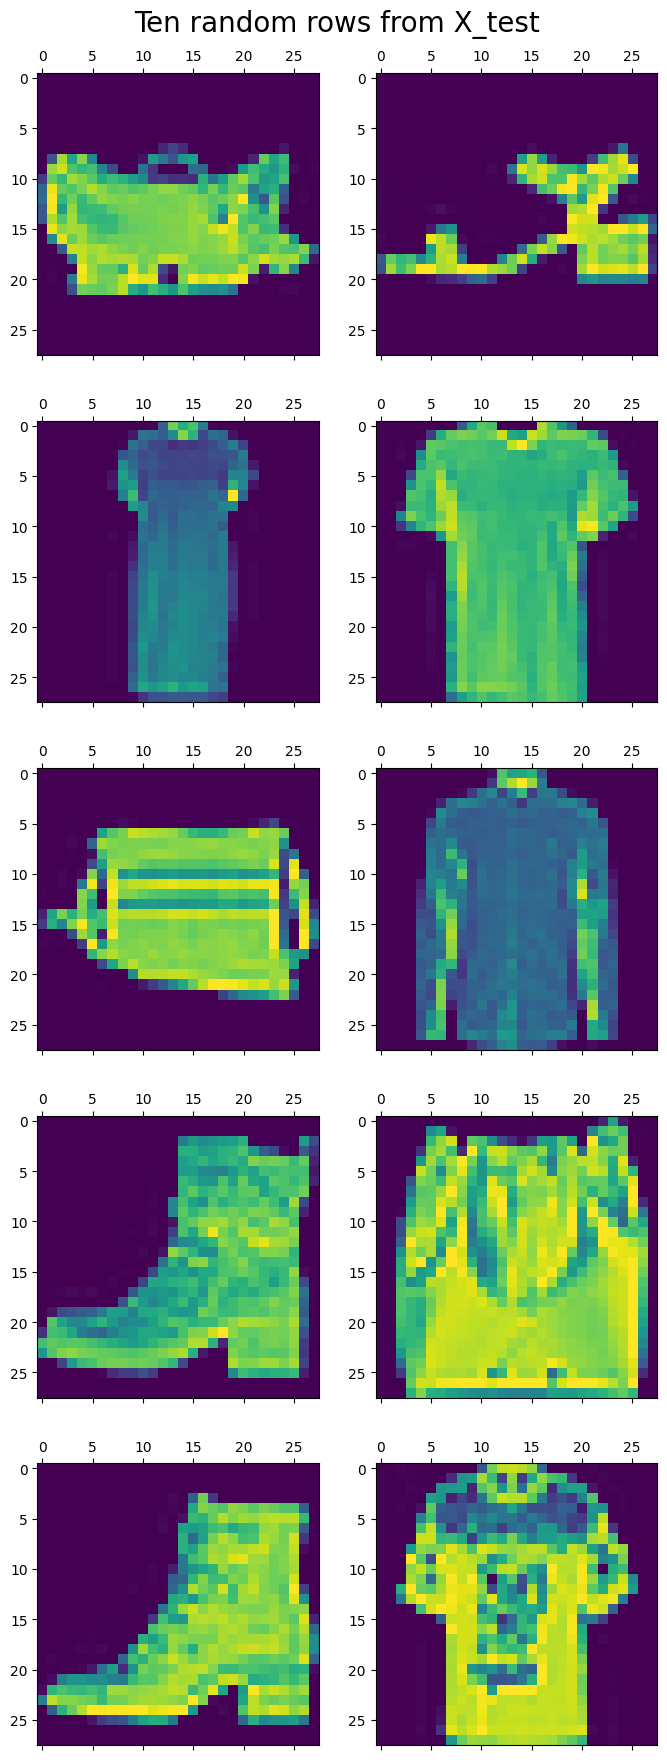

In [464]:
np.random.shuffle(X_train)
np.random.shuffle(X_test)
ten_random_rows_train = X_train[:10,:]
ten_random_rows_test = X_test[:10,:]

figure, axis = plt.subplots(5, 2,figsize=(8, 20))
row=0
for i in range(5):
   for ii in range(2):
      axis[i, ii].matshow(ten_random_rows_train[row].reshape(28,28))
      row+=1
plt.suptitle("Ten random rows from X_train", size=20)
plt.subplots_adjust(top=0.95)
plt.show()

figure, axis = plt.subplots(5, 2,figsize=(8, 20))

row=0
for i in range(5):
   for ii in range(2):
      axis[i, ii].matshow(ten_random_rows_test[row].reshape(28,28))
      row+=1
plt.suptitle("Ten random rows from X_test", size=20)
plt.subplots_adjust(top=0.95)
plt.show()


> From the above plots we can observe significant visual difference between the traning data and the test data plots. Specifically the training data tends to be noisy or contains minimal yet consiederable outliers. This could end up causing the model to fit the noise in the training data and not generalize well to new data. Also, from the number of positive and negative examples we can determine that the training data is quite imbalanced, meaning that one class has significantly more samples than the other, this can also limit the generalization performance of the classifier. In this case, the model may be biased towards the majority class and not perform well on the minority class.

##### <font color = '#A60000' > 1(iii) Which performance metric (e.g., accuracy, AUC-ROC and AUC-PR) should be used for this problem? Give the reasoning behind your choice(s). </font>

> The given dataset is quite imbalanced and hence relying on Accuracy as our performance metric is highly unreliable. 


##### 1(iv) What is the expected accuracy of a random classifier (one that generates random labels for a given example) for this problem over the training and test datasets? Demonstrate (either by a mathematical or statistical proof or a programming experiment) why this would be the case.

> In the below programatic experiement, I have tried demonstrating a random classifier which generates random labels for the training data and its accuracy over multiple runs. Using the sklearn.model_selection package's train_test_split() function, I've split the given training dataset into a 70/30 train-test split for this experiment. 

> The below function AccuracyOfRandomClassifier() generates random labels for the test data from the split and also calculates its accuracy by cross validating with the original labels of the test set. Taking an average of 10000 such experiments results in an approximate accuracy value of 50 percent. 

In [ ]:
from numpy.random import randn,randint
from sklearn.model_selection import train_test_split

Xtr, Xtt, Ytr, Ytt = train_test_split(X_train, Y_train, test_size=0.5)

def RandomClassifier(Xtt):
    Ypred = 2*randint(0,2,Xtt.shape[0])-1 
    return Ypred

def AccuracyOfRandomClassifier(Ypred,Ytt):
    accuracy = np.mean(Ypred==Ytt)
    return accuracy

cumulative_acc = 0
for ex in range(1000):
    cumulative_acc += AccuracyOfRandomClassifier(RandomClassifier(Xtt),Ytt)

avg_accuracy = cumulative_acc/1000.0
print(avg_accuracy)

0.5001964355555554


##### 1(v) What is the AUC-ROC and AUC-PR of a random classifier for this problem over the training and test datasets? Demonstrate (either by a mathematical or statistical proof or a programming experiment) why this would be the case.


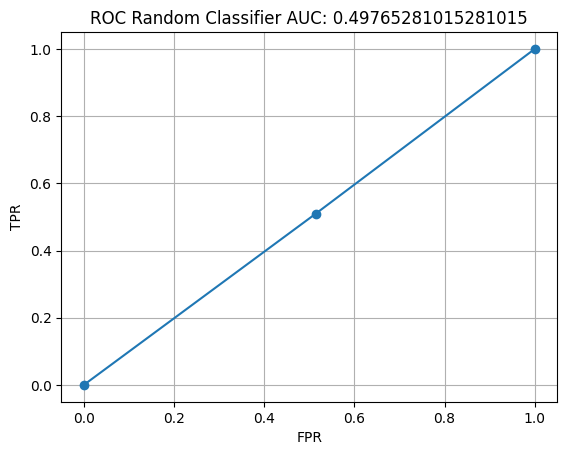

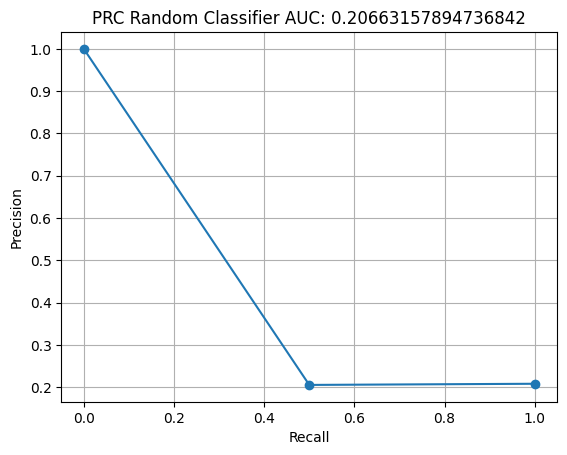

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve, average_precision_score, balanced_accuracy_score

def plotROC(y,z,pstr = ''):
    fpr,tpr,tt = roc_curve(y, z)
    roc_auc = auc(fpr, tpr)
    # plt.figure()
    # plt.plot(tt,fpr,'o-',tt,tpr,'x-');plt.xlabel('threshold');plt.ylabel('Percentage');plt.legend(['FPR','TPR']);plt.grid();plt.title(pstr)
    plt.figure()
    plt.plot(fpr,tpr,'o-');plt.xlabel('FPR');plt.ylabel('TPR');plt.grid();plt.title('ROC '+pstr+' AUC: '+str(roc_auc))
    return roc_auc

def plotPRC(y,z,pstr = ''):
    P,R,tt = precision_recall_curve(y, z)
    pr_auc = average_precision_score(y, z)
    #plt.figure()
    #plt.plot(tt,R[:-1],'o-',tt,P[:-1],'x-');plt.xlabel('threshold');plt.ylabel('Percentage');plt.legend(['Recall','Precision']);plt.grid();plt.title(pstr)
    plt.figure()
    plt.plot(R,P,'o-');plt.xlabel('Recall');plt.ylabel('Precision');plt.grid();plt.title('PRC '+pstr+' AUC: '+str(pr_auc))
    return pr_auc

roc_random_clf = plotROC(Ytr,RandomClassifier(Xtt),'Random Classifier')
pr_random_clf = plotPRC(Ytr,RandomClassifier(Xtt),'Random Classifier')


### Question No. 2: (Nearest Neighbor Classifier)

##### 2(i) What is the accuracy, balanced accuracy, AUC-ROC and AUC-PR for each fold using this classifier? Show code to demonstrate the results. Calculate the average and standard deviation for each metric across all folds and show these in a single table.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

accuracy = []
balanced_accuracy = []
roc = []
pr = []

Y_train_1d=np.ravel(Y_train)

for i,(tr_idx, v_idx) in enumerate(skf.split(X_train, Y_train_1d)):
  Xtr, Xv = X_train[tr_idx], X_train[v_idx]
  ytr, yv = Y_train_1d[tr_idx], Y_train_1d[v_idx]

  clf = KNeighborsClassifier(n_neighbors=3)
  clf.fit(Xtr,ytr)
  y_pred = clf.predict(Xv)
  y_score = clf.predict_proba(Xv)
  #roc_auc = plotROC(yv, y_score[:,1],pstr = 'Validation Fold: '+str(i))
  fpr,tpr,tt = roc_curve(yv, y_score[:,1])
  roc_auc = auc(fpr, tpr)
  #pr_auc = plotPRC(yv, y_score[:,1],pstr = 'Validation Fold: '+str(i))
  pr_auc = average_precision_score(yv, y_score[:,1])

  roc.append(roc_auc)
  pr.append(pr_auc)
  balanced_accuracy.append(balanced_accuracy_score(yv,y_pred))
  accuracy.append(np.mean(y_pred==yv))

print('Fold-Wise ROC AUC: ',roc)
print('Fold-wise PR AUC: ', pr)
print('Fold-wise Balanced Accuracy: ',balanced_accuracy)
print('Fold-wise accuracy: ',accuracy)
print('Mean AUC',np.mean(roc))
print('Stdev AUC',np.std(roc))

# creating a DataFrame
dic = {#'Fold-wise':['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'],
        'Accuracy':accuracy,
        'Balanced Accuracy':balanced_accuracy,
        'ROC-AUC':roc,
        'PR-AUC':pr
        }
df = pd.DataFrame(dic)

mean=df.mean()
mean.name = 'Average'
mean_df = pd.DataFrame([mean.transpose()])
stdv=df.std()
stdv.name = 'Standard Deviation'
std_df = pd.DataFrame([stdv.transpose()])

pd.concat([df,mean_df,std_df],axis=0, ignore_index=False)
#pd.concat(df,stdv.transpose(),ignore_index=True)


Fold-Wise ROC AUC:  [0.8933568831881473, 0.9017422319775019, 0.8826565608066397, 0.8835311063858975, 0.8828722878423754]
Fold-wise PR AUC:  [0.6451867853849425, 0.6584629687013472, 0.6512717231947801, 0.6521286785261, 0.6323430604834582]
Fold-wise Balanced Accuracy:  [0.8014610055559366, 0.8177687084162151, 0.791343713560601, 0.7974483846628713, 0.8003272485555044]
Fold-wise accuracy:  [0.8733333333333333, 0.875, 0.8766666666666667, 0.8766666666666667, 0.86]
Mean AUC 0.8888318140401124
Stdev AUC 0.007601346574746455


,Accuracy,Balanced Accuracy,ROC-AUC,PR-AUC
0,0.873333,0.801461,0.893357,0.645187
1,0.875000,0.817769,0.901742,0.658463
2,0.876667,0.791344,0.882657,0.651272
3,0.876667,0.797448,0.883531,0.652129
4,0.860000,0.800327,0.882872,0.632343
Average,0.872333,0.801670,0.888832,0.647879
Standard Deviation,0.007032,0.009817,0.008499,0.009877


##### 2(ii) Plot the ROC and PR curves for one fold. What are your observations about the ROC and PR curves? 

(3000, 1)


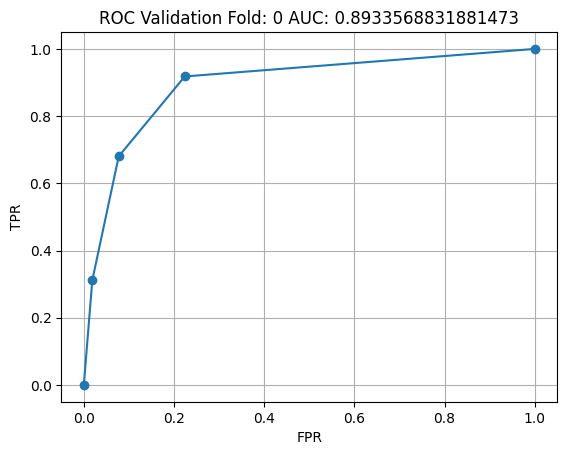

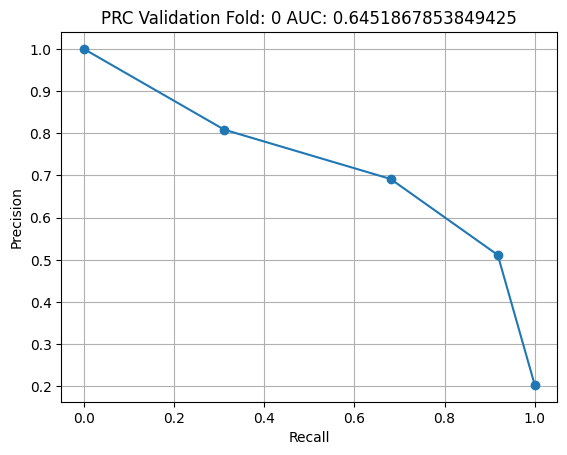

In [ ]:

skf = StratifiedKFold(n_splits=5)

accuracy = []
balanced_accuracy = []
roc = []
pr = []

Y_train_1d=np.ravel(Y_train)

for i,(tr_idx, v_idx) in enumerate(skf.split(X_train, Y_train_1d)):
  Xtr, Xv = X_train[tr_idx], X_train[v_idx]
  ytr, yv = Y_train_1d[tr_idx], Y_train_1d[v_idx]

  clf = KNeighborsClassifier(n_neighbors=3)
  clf.fit(Xtr,ytr)
  y_pred = clf.predict(Xv)
  y_score = clf.predict_proba(Xv)
  roc_auc = plotROC(yv, y_score[:,1],pstr = 'Validation Fold: '+str(i))
  pr_auc = plotPRC(yv, y_score[:,1],pstr = 'Validation Fold: '+str(i))
  break


> Comments on the ROC and PR curves

##### 2(iii) What is the impact of various forms of pre-processing (e.g., mean-standard deviation or standard scaling or min-max scaling) on the cross-validation performance? Show code to demonstrate the results and write a summary of your findings. Do any pre-processing techniques improve predictive performance? Why do you think this is the case?

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# print(X_train)

X_train_stdscaled = StandardScaler().fit_transform(X_train)
# print("After std scalar Pre processing")
# print(X_train_stdscaled)

X_train_minmax = MinMaxScaler().fit_transform(X_train)
# print("After min-max pre processing")
# print(X_train_minmax)

skf = StratifiedKFold(n_splits=5)

accuracy = []
balanced_accuracy = []
roc = []
pr = []

Y_train_1d=np.ravel(Y_train)

print("Without Pre-processing")

for i,(tr_idx, v_idx) in enumerate(skf.split(X_train, Y_train_1d)):
  Xtr, Xv = X_train[tr_idx], X_train[v_idx]
  ytr, yv = Y_train_1d[tr_idx], Y_train_1d[v_idx]

  clf = KNeighborsClassifier(n_neighbors=3)
  clf.fit(Xtr,ytr)
  y_pred = clf.predict(Xv)
  y_score = clf.predict_proba(Xv)
  #roc_auc = plotROC(yv, y_score[:,1],pstr = 'Validation Fold: '+str(i))
  fpr,tpr,tt = roc_curve(yv, y_score[:,1])
  roc_auc = auc(fpr, tpr)
  #pr_auc = plotPRC(yv, y_score[:,1],pstr = 'Validation Fold: '+str(i))
  pr_auc = average_precision_score(yv, y_score[:,1])

  roc.append(roc_auc)
  pr.append(pr_auc)
  balanced_accuracy.append(balanced_accuracy_score(yv,y_pred))
  accuracy.append(np.mean(y_pred==yv))

# creating a DataFrame
dic = {#'Fold-wise':['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'],
        'Accuracy':accuracy,
        'Balanced Accuracy':balanced_accuracy,
        'ROC-AUC':roc,
        'PR-AUC':pr
        }
df=pd.DataFrame(dic)

mean=df.mean()
mean.name = 'Average'
mean_df = pd.DataFrame([mean.transpose()])
stdv=df.std()
stdv.name = 'Standard Deviation'
std_df = pd.DataFrame([stdv.transpose()])
display(pd.concat([df,mean_df,std_df],axis=0, ignore_index=False))


print("Standard Scaler")

accuracy = []
balanced_accuracy = []
roc = []
pr = []

for i,(tr_idx, v_idx) in enumerate(skf.split(X_train_stdscaled, Y_train_1d)):
  Xtr, Xv = X_train_stdscaled[tr_idx], X_train_stdscaled[v_idx]
  ytr, yv = Y_train_1d[tr_idx], Y_train_1d[v_idx]

  clf = KNeighborsClassifier(n_neighbors=3)
  clf.fit(Xtr,ytr)
  y_pred = clf.predict(Xv)
  y_score = clf.predict_proba(Xv)
  #roc_auc = plotROC(yv, y_score[:,1],pstr = 'Validation Fold: '+str(i))
  fpr,tpr,tt = roc_curve(yv, y_score[:,1])
  roc_auc = auc(fpr, tpr)
  #pr_auc = plotPRC(yv, y_score[:,1],pstr = 'Validation Fold: '+str(i))
  pr_auc = average_precision_score(yv, y_score[:,1])

  roc.append(roc_auc)
  pr.append(pr_auc)
  balanced_accuracy.append(balanced_accuracy_score(yv,y_pred))
  accuracy.append(np.mean(y_pred==yv))

# creating a DataFrame
dict_ss = {#'Fold-wise':['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'],
        'Accuracy':accuracy,
        'Balanced Accuracy':balanced_accuracy,
        'ROC-AUC':roc,
        'PR-AUC':pr
        }
df_ss = pd.DataFrame(dict_ss)

mean=df_ss.mean()
mean.name = 'Average'
mean_df_ss = pd.DataFrame([mean.transpose()])
stdv=df_ss.std()
stdv.name = 'Standard Deviation'
std_df_ss = pd.DataFrame([stdv.transpose()])
display(pd.concat([df_ss,mean_df_ss,std_df_ss],axis=0, ignore_index=False))

print("Min-Max Scaler")

accuracy = []
balanced_accuracy = []
roc = []
pr = []

for i,(tr_idx, v_idx) in enumerate(skf.split(X_train_minmax, Y_train_1d)):
  Xtr, Xv = X_train_minmax[tr_idx], X_train_minmax[v_idx]
  ytr, yv = Y_train_1d[tr_idx], Y_train_1d[v_idx]

  clf = KNeighborsClassifier(n_neighbors=3)
  clf.fit(Xtr,ytr)
  y_pred = clf.predict(Xv)
  y_score = clf.predict_proba(Xv)
  #roc_auc = plotROC(yv, y_score[:,1],pstr = 'Validation Fold: '+str(i))
  fpr,tpr,tt = roc_curve(yv, y_score[:,1])
  roc_auc = auc(fpr, tpr)
  #pr_auc = plotPRC(yv, y_score[:,1],pstr = 'Validation Fold: '+str(i))
  pr_auc = average_precision_score(yv, y_score[:,1])

  roc.append(roc_auc)
  pr.append(pr_auc)
  balanced_accuracy.append(balanced_accuracy_score(yv,y_pred))
  accuracy.append(np.mean(y_pred==yv))

# creating a DataFrame
dict_mm = {#'Fold-wise':['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'],
        'Accuracy':accuracy,
        'Balanced Accuracy':balanced_accuracy,
        'ROC-AUC':roc,
        'PR-AUC':pr
        }
df_mm = pd.DataFrame(dict)

mean=df_mm.mean()
mean.name = 'Average'
mean_df_mm = pd.DataFrame([mean.transpose()])
stdv=df_mm.std()
stdv.name = 'Standard Deviation'
std_df_mm = pd.DataFrame([stdv.transpose()])
pd.concat([df_mm,mean_df_mm,std_df_mm],axis=0, ignore_index=False)
display(pd.concat([df_mm,mean_df_mm,std_df_mm],axis=0, ignore_index=False))


Without Pre-processing


,Accuracy,Balanced Accuracy,ROC-AUC,PR-AUC
0,0.873333,0.801461,0.893357,0.645187
1,0.875000,0.817769,0.901742,0.658463
2,0.876667,0.791344,0.882657,0.651272
3,0.876667,0.797448,0.883531,0.652129
4,0.860000,0.800327,0.882872,0.632343
Average,0.872333,0.801670,0.888832,0.647879
Standard Deviation,0.007032,0.009817,0.008499,0.009877


Standard Scaler


,Accuracy,Balanced Accuracy,ROC-AUC,PR-AUC
0,0.866667,0.800329,0.876672,0.643626
1,0.883333,0.816894,0.899221,0.683642
2,0.883333,0.804685,0.886343,0.670620
3,0.866667,0.778963,0.861496,0.642609
4,0.866667,0.798486,0.893474,0.638182
Average,0.873333,0.799872,0.883441,0.655736
Standard Deviation,0.009129,0.013713,0.014879,0.020170


Min-Max Scaler


,Accuracy,Balanced Accuracy,ROC-AUC,PR-AUC
0,0.873333,0.801461,0.893357,0.645187
1,0.875000,0.817769,0.901742,0.658463
2,0.876667,0.791344,0.882657,0.651272
3,0.876667,0.797448,0.883531,0.652129
4,0.860000,0.800327,0.882872,0.632343
Average,0.872333,0.801670,0.888832,0.647879
Standard Deviation,0.007032,0.009817,0.008499,0.009877


### Question No. 3:  CV



In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

Y_train_1d=np.ravel(Y_train)

def get_clf_metrics(clf):
  skf = StratifiedKFold(n_splits=5)
  
  accuracy = []
  balanced_accuracy = []
  roc = []
  pr = []

  for i,(tr_idx, v_idx) in enumerate(skf.split(X_train, Y_train_1d)):
    Xtr, Xv = X_train[tr_idx], X_train[v_idx]
    ytr, yv = Y_train_1d[tr_idx], Y_train_1d[v_idx]

    clf.fit(Xtr,ytr)
    y_pred = clf.predict(Xv)
    
    if 'KNeighborsClassifier' in clf.__str__() or 'GaussianNB' in clf.__str__():
      y_score = clf.predict_proba(Xv)
      y_score = y_score[:,1]

    # elif 'Perceptron' in clf.__str__():
    #   y_score = clf._predict_proba_lr(Xv)
    #   y_score = y_score[:,1]

    elif 'linear' in clf.__str__() or 'poly' in clf.__str__() or 'Perceptron' in clf.__str__():
      y_score = clf.decision_function(Xv)

    fpr,tpr,tt = roc_curve(yv, y_score)
    P,R,tt = precision_recall_curve(yv, y_score)
    
    roc_auc = auc(fpr, tpr)
    pr_auc = average_precision_score(yv, y_score)

    roc.append(roc_auc)
    pr.append(pr_auc)
    balanced_accuracy.append(balanced_accuracy_score(yv,y_pred))
    accuracy.append(np.mean(y_pred==yv))

  return np.mean(accuracy),np.std(accuracy),np.mean(balanced_accuracy),np.std(balanced_accuracy),\
    np.mean(roc),np.std(roc),np.mean(pr),np.std(pr),fpr,tpr,P,R

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_avg_accuracy, knn_std_accuracy, knn_avg_balanced_accuracy, knn_std_balanced_accuracy, \
  knn_avg_roc, knn_std_roc, knn_avg_pr, knn_std_pr, knn_fpr, knn_tpr, knn_P, knn_R = get_clf_metrics(knn_clf)

perceptron_clf = Perceptron()
perc_avg_accuracy, perc_std_accuracy, perc_avg_balanced_accuracy, perc_std_balanced_accuracy, \
  perc_avg_roc, perc_std_roc, perc_avg_pr, perc_std_pr, perc_fpr, perc_tpr, perc_P, perc_R = get_clf_metrics(perceptron_clf)

linear_clf = SVC(C = 1.0, kernel = 'linear', class_weight = 'balanced')
linear_avg_accuracy, linear_std_accuracy, linear_avg_balanced_accuracy, linear_std_balanced_accuracy, \
  linear_avg_roc, linear_std_roc, linear_avg_pr, linear_std_pr, linear_fpr, linear_tpr, linear_P, linear_R = get_clf_metrics(linear_clf)

kernelized_clf = SVC(C = 1, kernel = 'poly', degree = 2,  class_weight = 'balanced', coef0 = 1.0)
kernelized_avg_accuracy, kernelized_std_accuracy, kernelized_avg_balanced_accuracy, kernelized_std_balanced_accuracy, \
  kernelized_avg_roc, kernelized_std_roc, kernelized_avg_pr, kernelized_std_pr, kernelized_fpr, kernelized_tpr, kernelized_P, kernelized_R = get_clf_metrics(kernelized_clf)

naive_clf = GaussianNB()
naive_avg_accuracy, naive_std_accuracy, naive_avg_balanced_accuracy, naive_std_balanced_accuracy, \
  naive_avg_roc, naive_std_roc, naive_avg_pr, naive_std_pr, naive_fpr, naive_tpr, naive_P, naive_R = get_clf_metrics(naive_clf)

## Average
avg_dict = {
        'Accuracy':[perc_avg_accuracy, knn_avg_accuracy, naive_avg_accuracy, linear_avg_accuracy, kernelized_avg_accuracy],
        'Balanced Accuracy': [perc_avg_balanced_accuracy, knn_avg_balanced_accuracy, naive_avg_balanced_accuracy, linear_avg_balanced_accuracy, kernelized_avg_balanced_accuracy],
        'ROC-AUC': [perc_avg_roc, knn_avg_roc, naive_avg_roc, linear_avg_roc, kernelized_avg_roc],
        'PR-AUC': [perc_avg_pr, knn_avg_pr, naive_avg_pr, linear_avg_pr, kernelized_avg_pr]
        }

avg_df = pd.DataFrame(avg_dict)
avg_df.index = ['Perceptron', 'KNN', 'Naïve Bayes', 'Linear SVM', 'Kernalized SVM']
#display(avg_df)

## Standard Deviation
std_dict = {
        'Accuracy':[perc_std_accuracy, knn_std_accuracy, naive_std_accuracy, linear_std_accuracy, kernelized_std_accuracy],
        'Balanced Accuracy': [perc_std_balanced_accuracy, knn_std_balanced_accuracy, naive_std_balanced_accuracy, linear_std_balanced_accuracy, kernelized_std_balanced_accuracy],
        'ROC-AUC': [perc_std_roc, knn_std_roc, naive_std_roc, linear_std_roc, kernelized_std_roc],
        'PR-AUC': [perc_std_pr, knn_std_pr, naive_std_pr, linear_std_pr, kernelized_std_pr]
        }

std_df = pd.DataFrame(std_dict)
std_df.index = ['Perceptron', 'KNN', 'Naïve Bayes', 'Linear SVM', 'Kernalized SVM']
#display(std_df)


(0.0, 1.0, 0.0, 1.0)

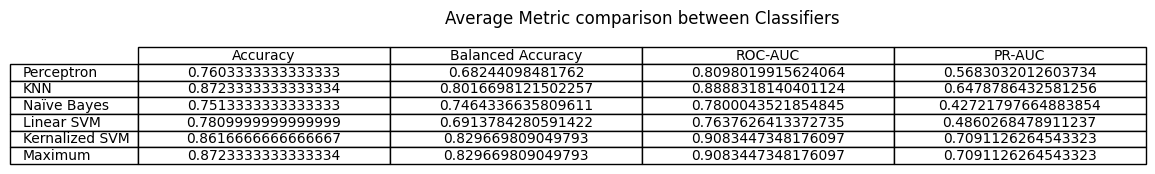

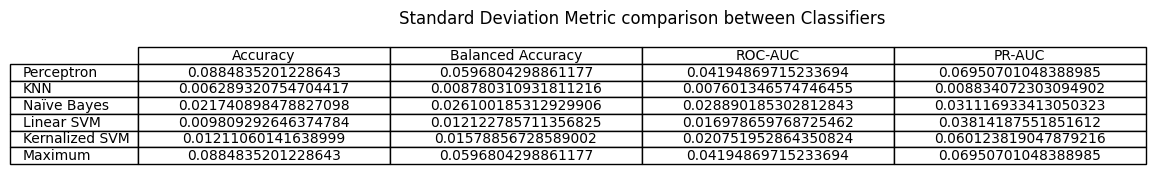

In [ ]:

avg_max = avg_df.max()

avg_max.name = "Maximum"

avg_max_df = pd.DataFrame([avg_max.transpose()])

display_avg_df = pd.concat([avg_df,avg_max_df],axis=0, ignore_index=False)

std_max = std_df.max()
std_max.name = "Maximum"
std_max_df = pd.DataFrame([std_max.transpose()])

display_std_df = pd.concat([std_df,std_max_df],axis=0, ignore_index=False)

fig = plt.figure(figsize = (13, .2))
ax = fig.add_subplot(111)
ax.table(cellText = display_avg_df.values, rowLabels = display_avg_df.index, colLabels = display_avg_df.columns, cellLoc='center')
ax.set_title('Average Metric comparison between Classifiers')
#turn axes off
ax.axis('off')

fig = plt.figure(figsize = (13, .2))
ax = fig.add_subplot(111)
ax.table(cellText = display_std_df.values, rowLabels = display_avg_df.index, colLabels = display_std_df.columns, cellLoc='center')
ax.set_title('Standard Deviation Metric comparison between Classifiers')
#turn axes off
ax.axis('off')

#### 3(iii) Plot the ROC curves of all classifiers on the same axes for easy comparison.




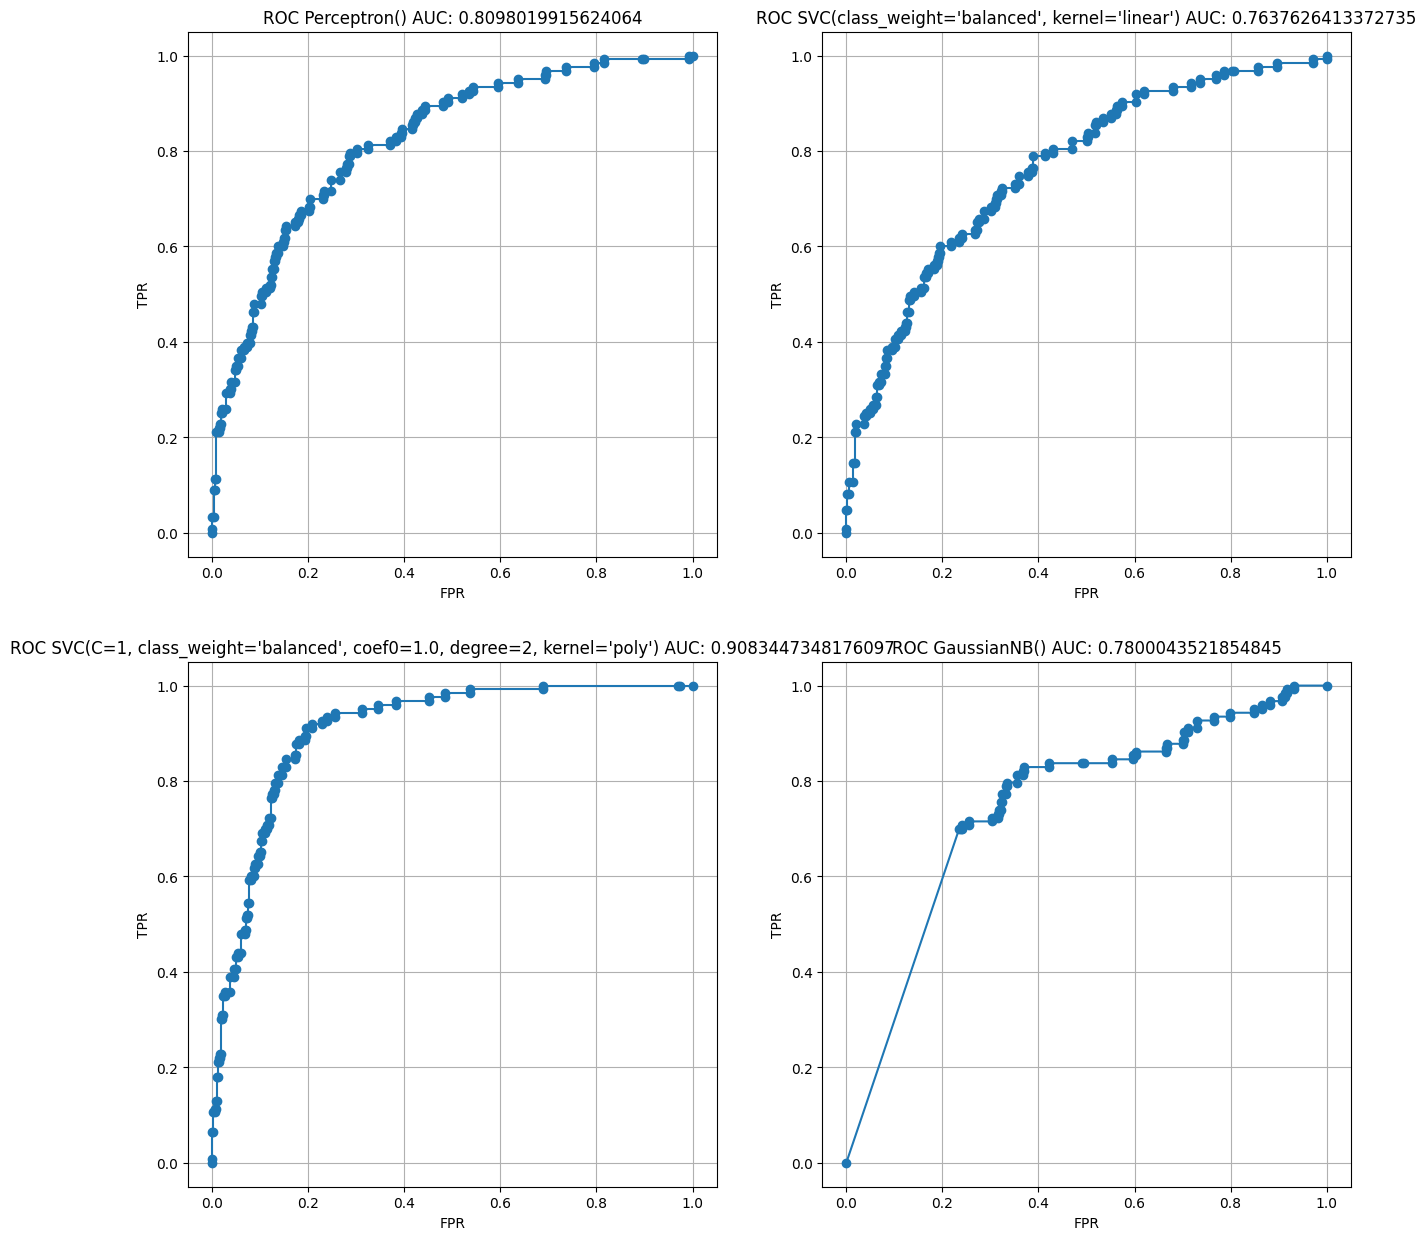

In [ ]:

figure, axis = plt.subplots(2,2,figsize=(15, 15))

def plot_roc(roc_auc, fpr, tpr, gridx, gridy, pstr= ''):
    axis[gridx,gridy].plot(fpr,tpr,'o-')
    axis[gridx,gridy].set_xlabel('FPR')
    axis[gridx,gridy].set_ylabel('TPR')
    axis[gridx,gridy].grid()
    axis[gridx,gridy].set_title('ROC ' + pstr+' AUC: ' + str(roc_auc))

#plot_roc(knn_avg_roc,knn_fpr,knn_tpr,knn_clf.__str__())
plot_roc(perc_avg_roc,perc_fpr,perc_tpr, 0, 0, perceptron_clf.__str__())
plot_roc(linear_avg_roc,linear_fpr,linear_tpr, 0, 1, linear_clf.__str__())
plot_roc(kernelized_avg_roc,kernelized_fpr, kernelized_tpr, 1, 0, kernelized_clf.__str__())
plot_roc(naive_avg_roc,naive_fpr,naive_tpr, 1, 1, naive_clf.__str__())


#### 2(iv) Plot the PR curves of all classifier on the same axes for comparison. 

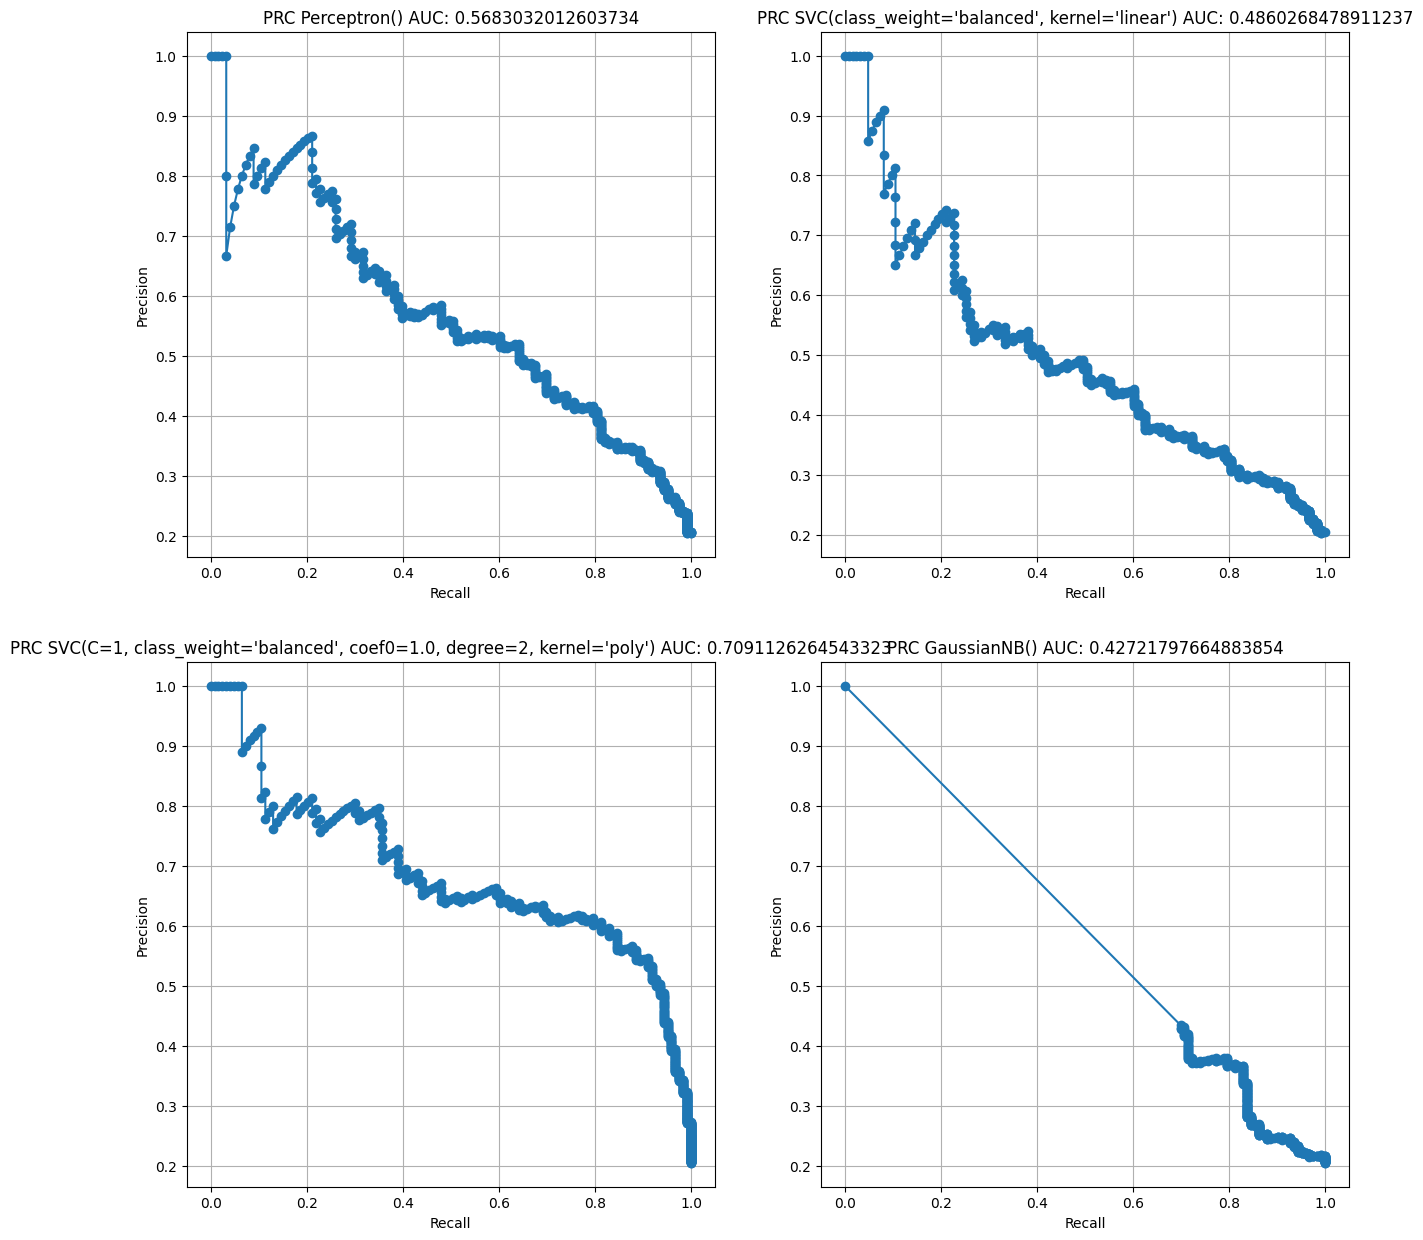

In [ ]:

figure, axis = plt.subplots(2,2,figsize=(15, 15))

def plot_prc(pr_auc, P, R, gridx, gridy, pstr = ''):
    axis[gridx,gridy].plot(R,P,'o-')
    axis[gridx,gridy].set_xlabel('Recall')
    axis[gridx,gridy].set_ylabel('Precision')
    axis[gridx,gridy].grid()
    axis[gridx,gridy].set_title('PRC '+pstr+' AUC: '+str(pr_auc))

#plot_roc(knn_avg_roc,knn_fpr,knn_tpr,knn_clf.__str__())
plot_prc(perc_avg_pr,perc_P,perc_R, 0, 0, perceptron_clf.__str__())
plot_prc(linear_avg_pr,linear_P,linear_R, 0, 1, linear_clf.__str__())
plot_prc(kernelized_avg_pr,kernelized_P, kernelized_R, 1, 0, kernelized_clf.__str__())
plot_prc(naive_avg_pr,naive_P,naive_R, 1, 1, naive_clf.__str__())

> Comments on the ROC Curve and PR Curves

### Question No. 4 PCA

#### 4(i) Reduce the number of dimensions of the training data using PCA to 2 and plot a scatter plot of the training data showing examples of each class in a different color. What are your observations about the data based on this plot?


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


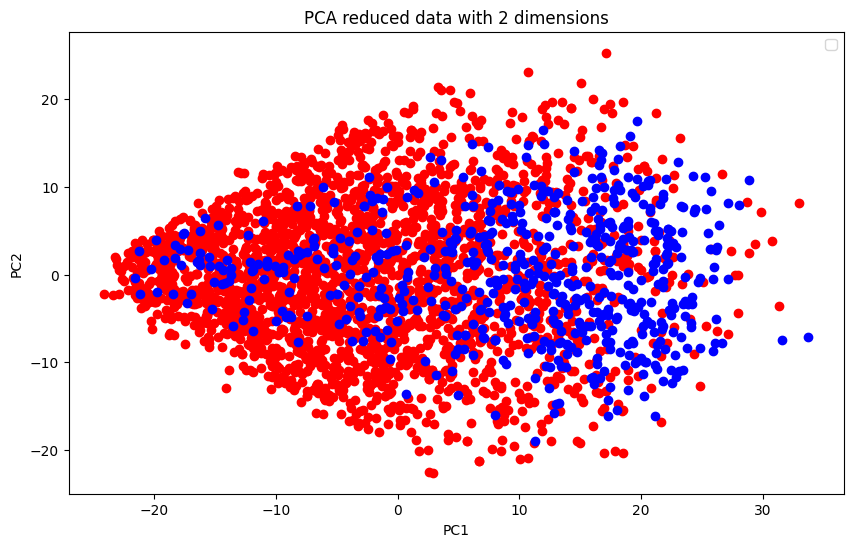

In [ ]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=2)
X_projected = pca.fit_transform(X_train_scaled)

df = pd.DataFrame(X_projected, columns=['PC1', 'PC2'])
df['target'] = Y_train_1d

# i1 = 0 #first principal component
# i2 = 1 #second principal component
# plt.scatter(X_projected[:, i1], X_projected[:, i2],
#             c=Y_train_1d, edgecolor='none', alpha=0.9,
#             cmap=plt.cm.get_cmap('nipy_spectral', 10));
# plt.grid()
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.colorbar();
# plt.show()


colors = ['r', 'b']

plt.figure(figsize=(10, 6))
for i in range(2):
    a = -1 if (i==0) else 1
    plt.scatter(df[df['target']==a]['PC1'], df[df['target']==a]['PC2'], c=colors[i])
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA reduced data with 2 dimensions')
plt.show()


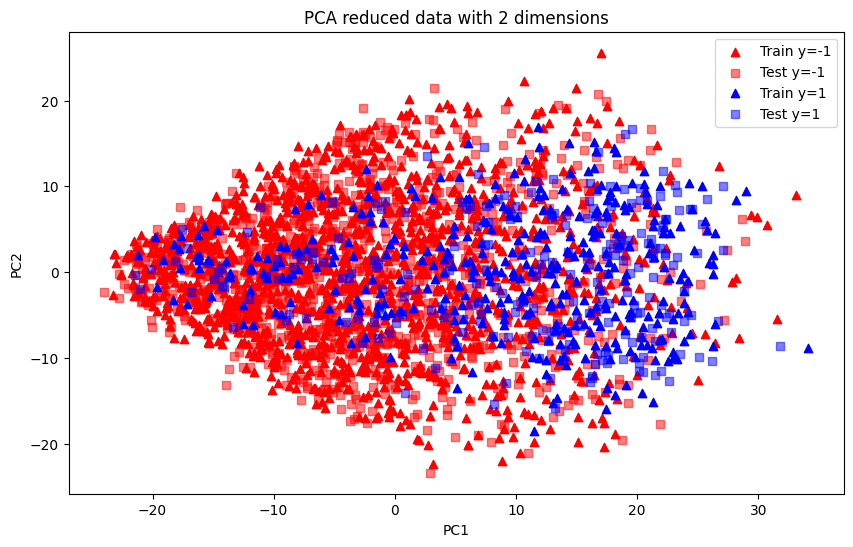

In [ ]:


Xtr,Xtt,Ytr,Ytt = train_test_split(X_train, Y_train_1d, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtr)
X_test_scaled = scaler.transform(Xtt)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

train_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
train_df['target'] = Ytr
test_df = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'])
test_df['target'] = Ytt

colors = ['r', 'b']
markers = ['^', 's']

plt.figure(figsize=(10, 6))
for i in range(2):
    a = -1 if (i==0) else 1
    # plt.scatter(df[df['target']==a]['PC1'], df[df['target']==a]['PC2'], c=colors[i],marker=markers[i], label='Train Y='+a)
    plt.scatter(train_df[train_df['target']==a]['PC1'], train_df[train_df['target']==a]['PC2'], \
        c=colors[i], marker=markers[0], label='Train y='+str(a))
    plt.scatter(test_df[test_df['target']==a]['PC1'], test_df[test_df['target']==a]['PC2'], \
        c=colors[i], marker=markers[1], label='Test y='+str(a), alpha=0.5)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA reduced data with 2 dimensions')
plt.show()

> observations on the plot

#### 4(iii) Plot the scree graph of PCA and find the number of dimensions that explain 95% variance in the training set. 

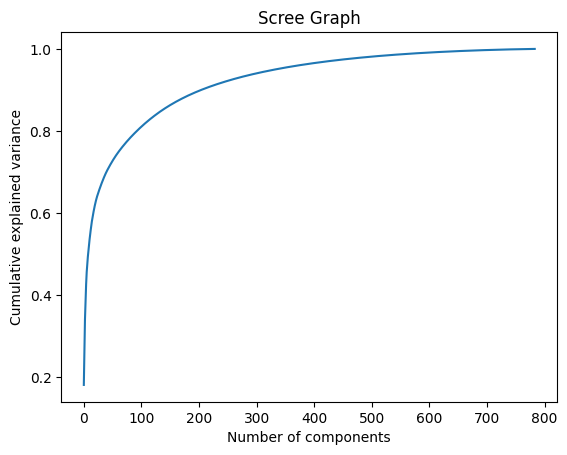

Number of dimensions that explain 95% variance: 334


In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Scree Graph')
plt.show()

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of dimensions that explain 95% variance: {n_components}")

> From the Cumulative Variance ratio. we're able to calculate the number of dimension that explains 95% of variance. Taking argmax + 1 of cumulative_variance_ratio over 0.95 shows that we need two dimensions to explain 95% of the variance in the training set.

#### 4(iv) Reduce the number of dimensions of the data using PCA and perform classification.  What is the (optimal) cross-validation performance of a Kernelized SVM classification with PCA? Remember to perform hyperparameter optimization!

In [ ]:
from sklearn.model_selection import GridSearchCV

#Xtr,Xtt,Ytr,Ytt = train_test_split(X_train, Y_train_1d, test_size=0.4, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=334)
X_train_pca = pca.fit_transform(X_train_scaled)

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100], 'kernel': ['rbf']}
svm = SVC()
svm_cv = GridSearchCV(svm, param_grid, cv=5)
svm_cv.fit(X_train_pca, Y_train_1d)

print("Best hyperparameters:", svm_cv.best_params_)
print("Cross-validation score:", svm_cv.best_score_)

Best hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Cross-validation score: 0.8


> After scaling the X_train data using StandardScalar and applying PCA with 2 components, I've used GridSearchCV to perform hyperparameter optimization in the above Kernalized SVM Classification with RBF problem. The above snippet yeilds of Cross Validation score of 82.53% which is indicative of the average accuracy of the model over 5 folds cross validation.

### Question No. 5 Optimal Pipeline for Classification

> In the below code snippet. I have defined a pipeline performing standard scaling, dimensionality reduction with PCA and classification with a Kernelized SVM using optimized hyperparameters {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} all from previous results. 

In [425]:
# from sklearn.pipeline import Pipeline

# pipe = Pipeline([
#     ('scaler', StandardScaler()),
#     ('pca', PCA()),
#     ('svm', SVC())
# ])

# # Step 3: Define the parameter grid for hyperparameter optimization
# param_grid = {
#     'pca__n_components': [2, 3, 4],
#     'svm__C': [0.1, 1, 10, 100],
#     'svm__gamma': [0.1, 1, 10, 100],
#     'svm__kernel': ['rbf']
# }

# # Step 4: Perform hyperparameter optimization using cross-validation
# svm_cv = GridSearchCV(pipe, param_grid, cv=5)
# svm_cv.fit(X_train, Y_train_1d)

# # Step 5: Print best hyperparameters and test score
# print("Best hyperparameters:", svm_cv.best_params_)
# # print("Test score:", svm_cv.score(X_test, y_test))
# print("Test score:", svm_cv.predict(X_test))

In [429]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    # ('pca', PCA(n_components=334)),
    ('pca', PCA(n_components=2)),
    ('clf', SVC(C=1, gamma=0.1, kernel='rbf'))
])

pipeline.fit(X_train, Y_train_1d)

# predict the labels of the test data
Y_test_1d = pipeline.predict(X_test)
Y_test = Y_test_1d.reshape(3000,1)

dict = __builtins__.dict

print("Number of elements in test set: " + str(len(Y_test)))

unique, counts = np.unique(Y_test, return_counts=True)
class_sep=dict(zip(unique, counts))
print("Negative Class in Y Test: " +  str(class_sep.get(-1)))
print("Positive Class in Y Test: " +  str(class_sep.get(1)))

# write the Y Test values to a CSV file
np.savetxt("../data/u2238887.csv", Y_test, delimiter=' ')

Number of elements in test set: 3000
Negative Class in Y Test: 2619
Positive Class in Y Test: 381


### Question No. 6

In [439]:
y_train_ex = -1 * np.ones(X_train.shape[0])
y_test_ex = np.ones(X_test.shape[0])

X = np.vstack((X_train, X_test))
y = np.concatenate((y_train_ex, y_test_ex))

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('clf', SVC(kernel='rbf', C=1, gamma=0.1, probability=True))
    #('clf', SVC(kernel='poly', C=1, gamma=0.1, degree=2, coef0=0.1))
])

skf = StratifiedKFold(n_splits=5)
auc_scores = []
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    pipe.fit(X_train_fold, y_train_fold)
    y_score = pipe.decision_function(X_test_fold)
    auc_scores.append(roc_auc_score(y_test_fold, y_score))

print("Average AUC-ROC: " + str(np.mean(auc_scores)))
print("Standard deviation of AUC-ROC: " + str(np.std(auc_scores)))



Average AUC-ROC: 0.8048022222222224
Standard deviation of AUC-ROC: 0.012441304464971664


> In the above py snippet, I've used Kernalized SVM classifier for the hypothetical classification problem given and from the result of a high AUC-ROC value of 0.8, we can understand that the classifier is able to distinguish between positive and negative examples from the training and test sets with a high degree of accuracy. 

> Furthermore, a low Standard deviation value of 0.012 indicates that the classifier's performance stays consistent between the 5 folds of cross validation.
